In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use ("ggplot")

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

import warnings
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
from matplotlib import style


Import Data

In [29]:
# load the dataset
df = pd.read_csv("/Users/sa18/Desktop/Financial_Fraud/fin_fraud_data.csv")

Data Understanding

In [30]:
# shape of DataFrame (rows, columns)
df.shape

(6362620, 11)

In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
# list the columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [33]:
# check dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [34]:
numerical_cols=df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [35]:
categorical_cols=df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [36]:
# info and stats about data set
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [37]:
# check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [38]:
# check for duplicates
df.duplicated().sum()

0

In [39]:
# count unique values in each column
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [40]:
# get type counts 
type_counts = df.value_counts("type")
type_counts.to_frame()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


<function matplotlib.pyplot.show(close=None, block=None)>

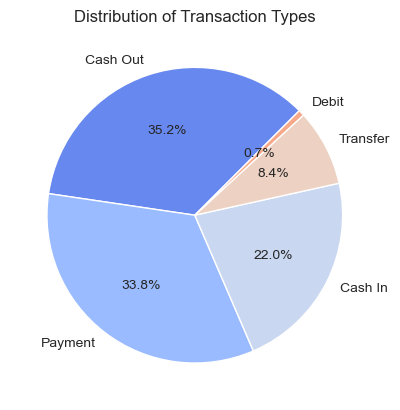

In [41]:
#visualization of transaction types

# input value counts for "type", to create visual
size = [2237500, 2151495, 1399284, 532909, 41432]
label = ('Cash Out', 'Payment', 'Cash In', 'Transfer', 'Debit')

# create pie chart & title
plt.pie(size, labels=label, autopct='%1.1f%%', colors=sns.color_palette("coolwarm"), startangle=45)

plt.title ("Distribution of Transaction Types")

# display pie chart
plt.show



##Intial Exploratory Data Analyses: Univariate, Bivariate, Multivariate

##Univariate Analyses

In [42]:
#analyzing "isFraud" to see which transaction types are likely to be fraudulent
Fraud_df= df[df["isFraud"] == 1]
NotFraud_df= df[df["isFraud"] == 0]
df_fraud = df.value_counts("isFraud")
df_fraud.to_frame()

,count
isFraud,
0,6354407
1,8213


In [43]:
Fraud_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

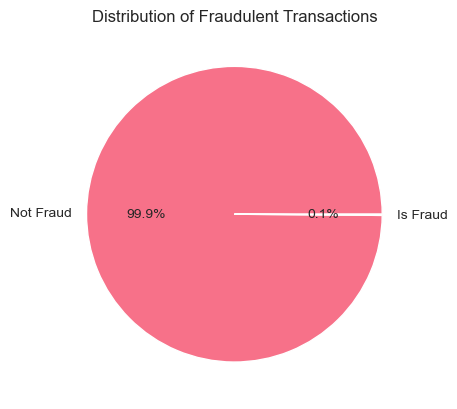

In [44]:
# input value counts for "type", to create visual
size = [6354407, 8213]
label = ('Not Fraud', 'Is Fraud')

# create pie chart & title
plt.pie(size, labels=label, autopct='%1.1f%%', colors=sns.color_palette("husl"))

plt.title ("Distribution of Fraudulent Transactions")

# display pie chart
plt.show



In [45]:
# value count for "isFlaggedFraud"
type_counts=df.value_counts('isFlaggedFraud')
type_counts.to_frame()

,count
isFlaggedFraud,
0,6362604
1,16


<function matplotlib.pyplot.show(close=None, block=None)>

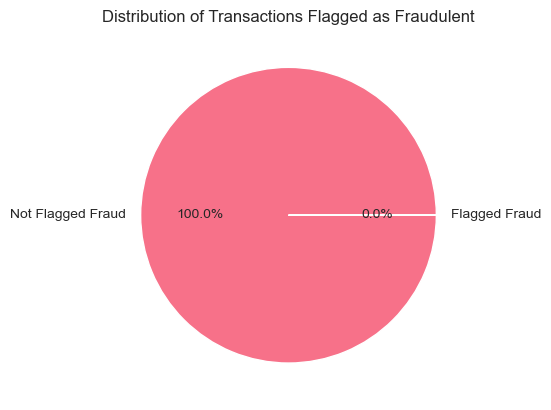

In [46]:
# input value counts for "type", to create visual
size = [6362604, 16]
label = ('Not Flagged Fraud', 'Flagged Fraud')

# create pie chart & title
plt.pie(size, labels=label, autopct='%1.1f%%', colors=sns.color_palette("husl"))

plt.title ("Distribution of Transactions Flagged as Fraudulent")

# display pie chart
plt.show


/var/folders/7d/lbg415rs1336xg8yjmf1h_3c0000gn/T/ipykernel_12806/3379249563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='isFlaggedFraud', data=df, jitter=True, palette='husl', size=7)


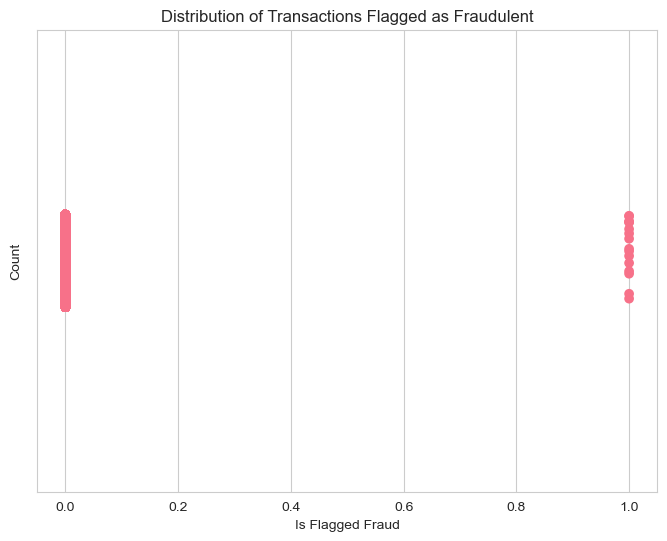

In [48]:
plt.figure(figsize=(8,6))
sns.stripplot(x='isFlaggedFraud', data=df, jitter=True, palette='husl', size=7)
plt.title("Distribution of Transactions Flagged as Fraudulent")
plt.xlabel("Is Flagged Fraud")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

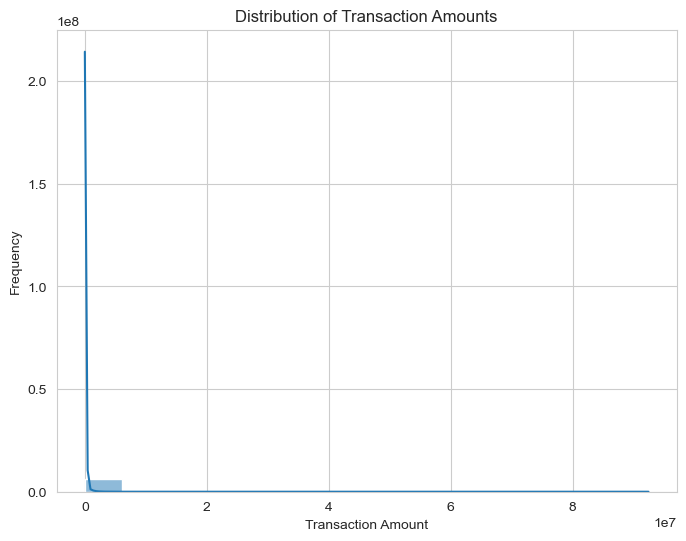

In [49]:
# analysis of Distribution of Transaction Amounts
plt.figure(figsize= (8,6))
sns.histplot(df['amount'], bins=15, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show

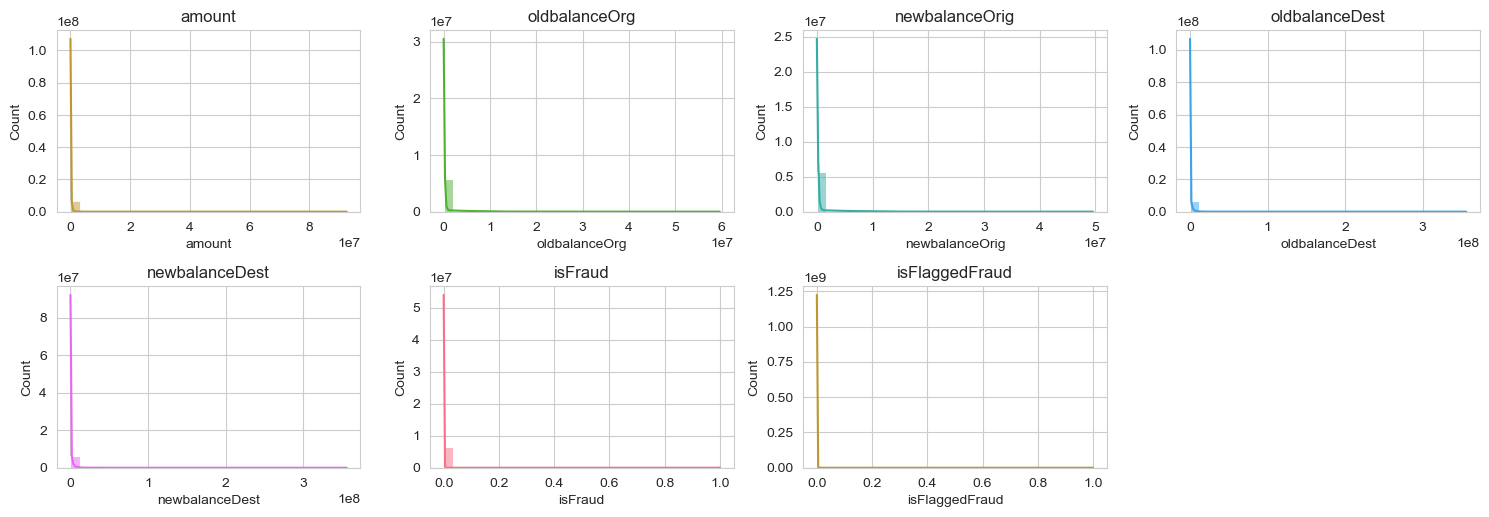

In [50]:
# create histograms to show how each numerical columns are distributed, and their frequency/count
#from matplotlib import style


other_df = df.drop(columns=['step', 'nameOrig', 'nameDest'])

sns.set_style (style="whitegrid")

numerical_cols = other_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color=sns.color_palette("husl")[i % len(sns.color_palette("husl"))])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

## Bivariate Analysis

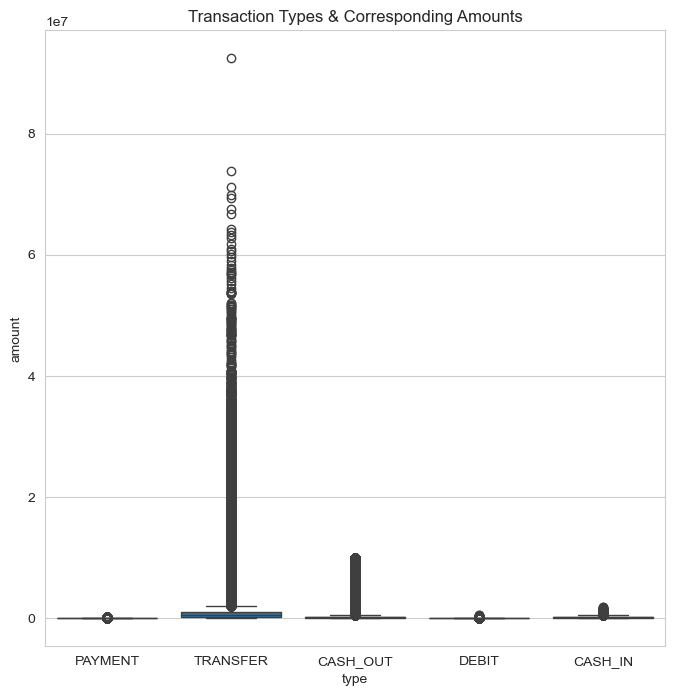

In [51]:
#Relationship between types of transactions and corresponding amounts
plt.figure(figsize=(8,8))
sns.boxplot(x="type", y="amount", data=df)
plt.title("Transaction Types & Corresponding Amounts")
plt.show()


In [52]:
#analyze frequency of Cash_In transactions against origin account and destination account. 

cash_in_df = df[df["type"] == 'CASH_IN']

nameOrig_counts = cash_in_df['nameOrig'].value_counts().to_frame()
nameDest_counts = cash_in_df['nameDest'].value_counts().to_frame()

print("NameOrig Counts for Cash In:")
print(nameOrig_counts)

print("NameDest Counts for Cash In: ")
print(nameDest_counts)

NameOrig Counts for Cash In:
             count
nameOrig          
C1462946854      3
C760341091       2
C392773795       2
C434813448       2
C1513186939      2
...            ...
C340384963       1
C2040885112      1
C291519248       1
C1197111906      1
C759614959       1

[1398845 rows x 1 columns]
NameDest Counts for Cash In: 
             count
nameDest          
C985934102      46
C451111351      44
C1590550415     39
C1816757085     38
C564160838      38
...            ...
C795127455       1
C1868946769      1
C969788641       1
C1238300543      1
C204102272       1

[446789 rows x 1 columns]


## Multivariate Analysis

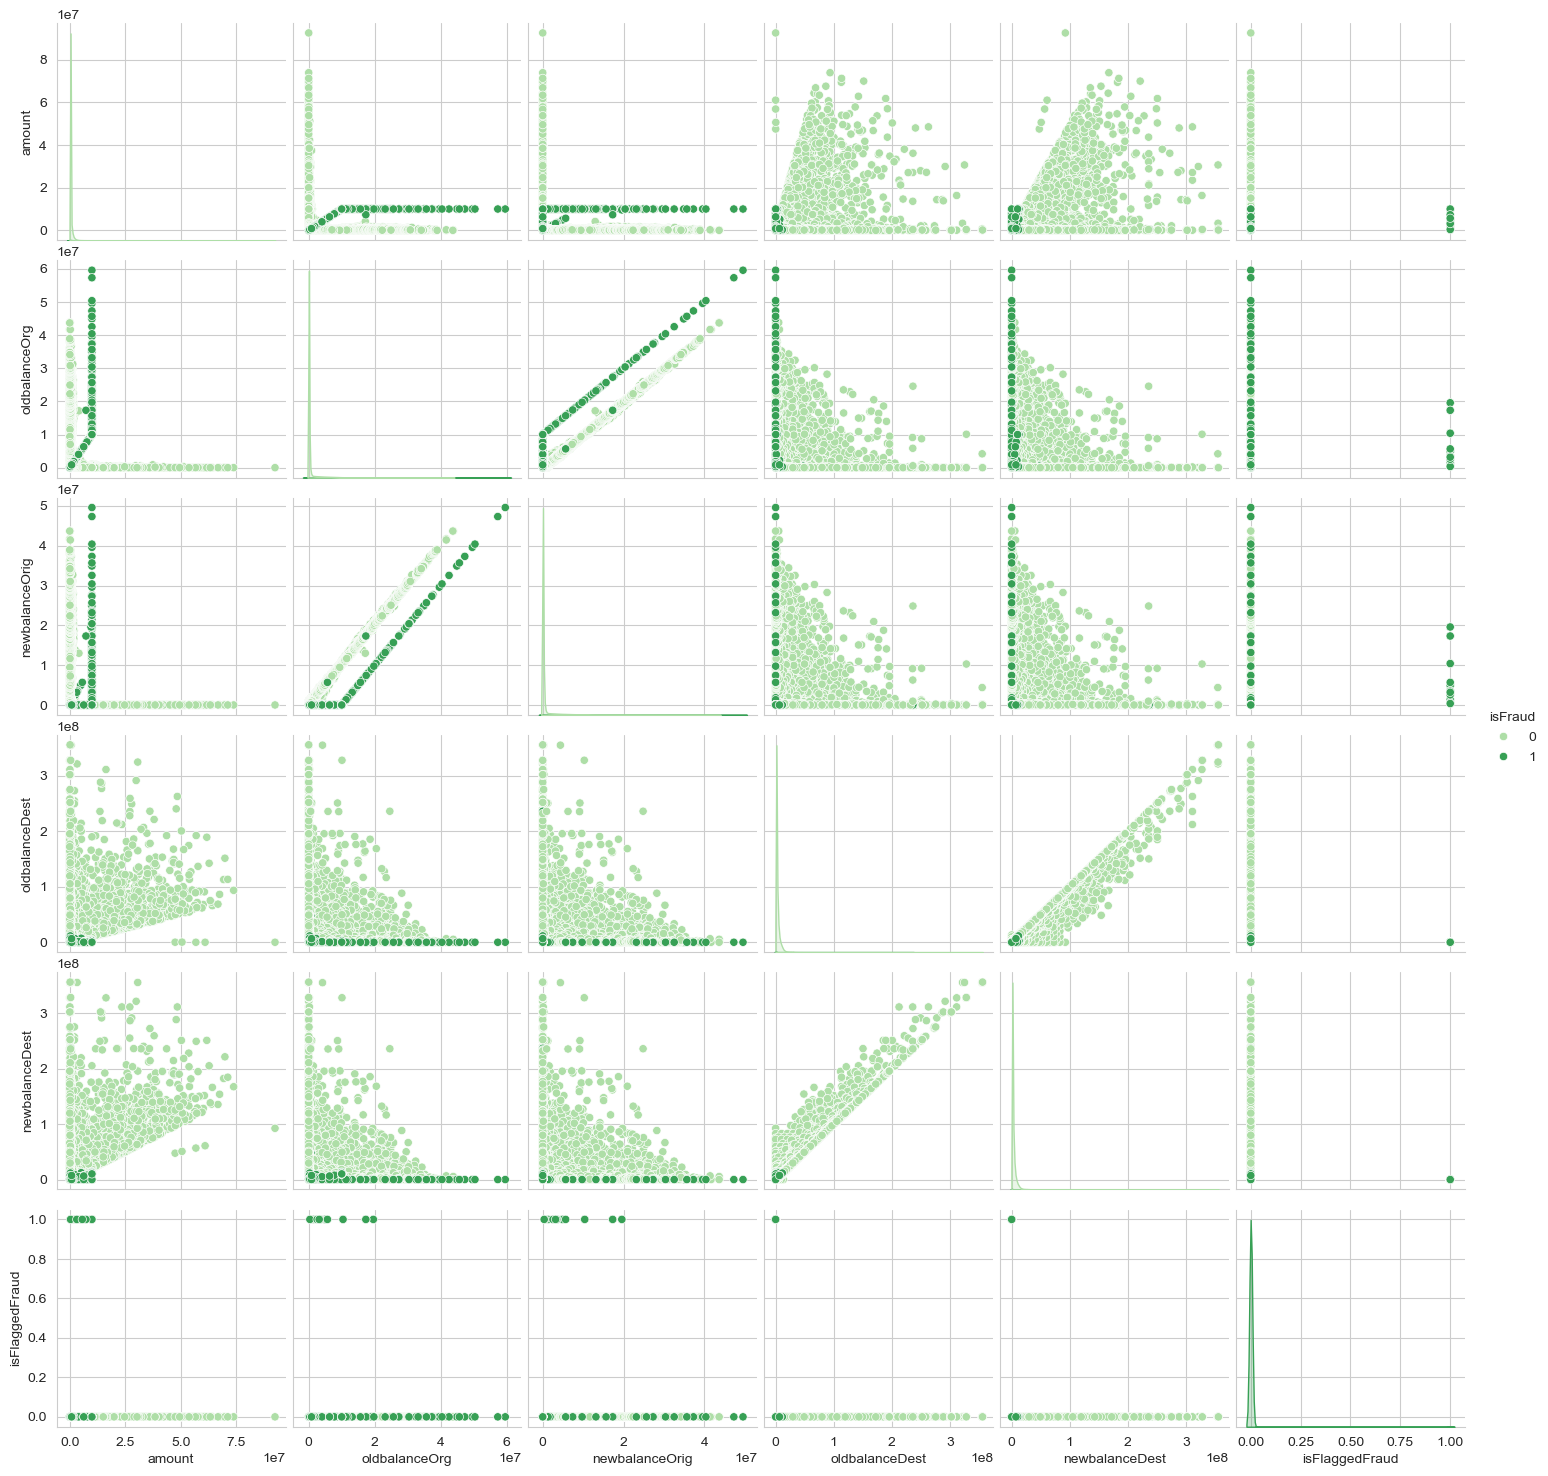

In [54]:
sns.pairplot(other_df, hue='isFraud', palette='Greens')
plt.show()